<h1><center><b>Project 2</b></center></h1>

<h2><center><b>Baseball Case Study</b></center></h2>

<img src="https://cdn.pixabay.com/photo/2016/03/29/08/48/project-1287781_1280.jpg">

***First importing necessary packages***

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()
import warnings
warnings.filterwarnings("ignore")

***Importing data which is in csv format***

In [2]:
df=pd.read_csv('baseball.csv')
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


The column names in the above table are the abbreviations for Number of predicted wins,Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts,Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, and Errors respectively

<h2>Start of EDA process</h2>

***Checking shape of the Dataset***

In [3]:
df.shape

(30, 17)

We see that table contains **30 rows** and **17 columns** out of which **W** is the **output variable** and rest **16** are the **input attributes**

***Checking for Null values***

In [4]:
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

We can see that there is no null values in the dataset, so we don't have to worry about it

***Checking for outliers***

*First we will check for outliers visually for each attributes, for this box plot is the best option*

AxesSubplot(0.125,0.125;0.775x0.755)


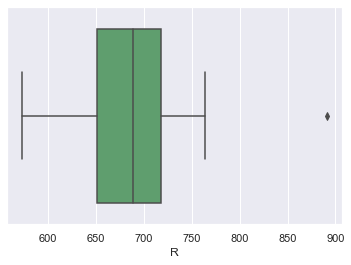

AxesSubplot(0.125,0.125;0.775x0.755)


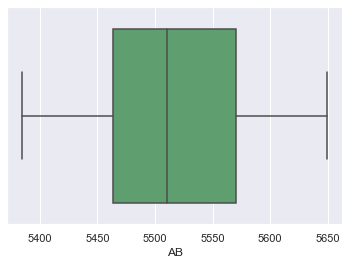

AxesSubplot(0.125,0.125;0.775x0.755)


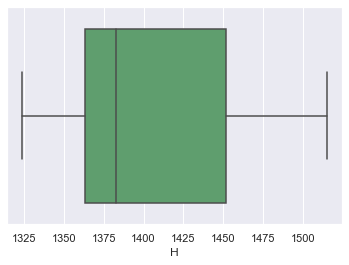

AxesSubplot(0.125,0.125;0.775x0.755)


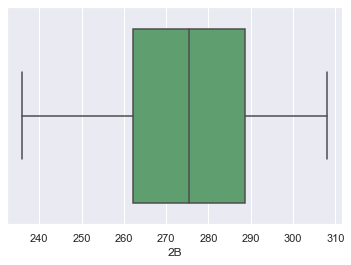

AxesSubplot(0.125,0.125;0.775x0.755)


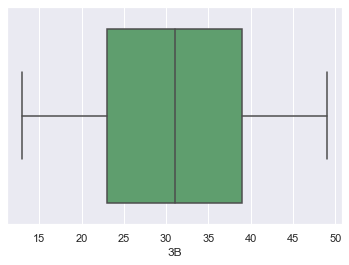

AxesSubplot(0.125,0.125;0.775x0.755)


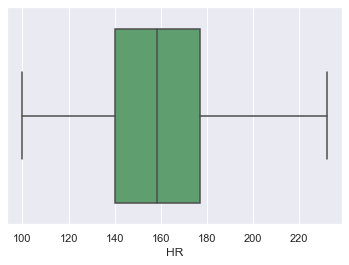

AxesSubplot(0.125,0.125;0.775x0.755)


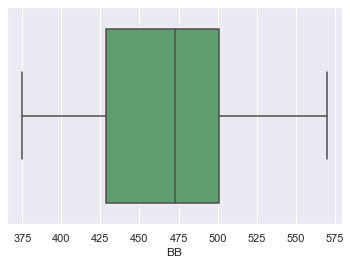

AxesSubplot(0.125,0.125;0.775x0.755)


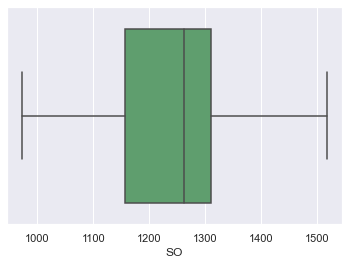

AxesSubplot(0.125,0.125;0.775x0.755)


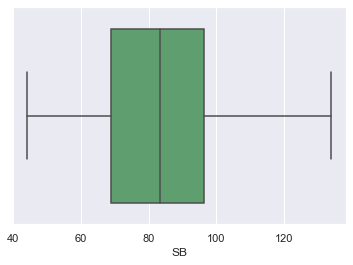

AxesSubplot(0.125,0.125;0.775x0.755)


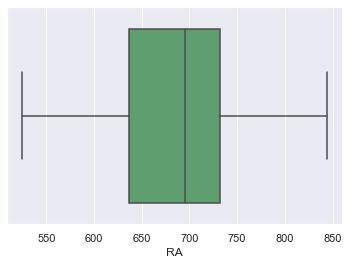

AxesSubplot(0.125,0.125;0.775x0.755)


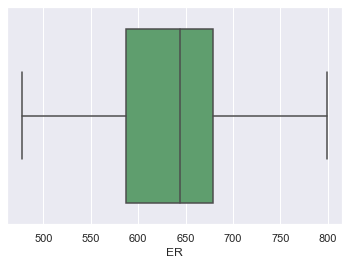

AxesSubplot(0.125,0.125;0.775x0.755)


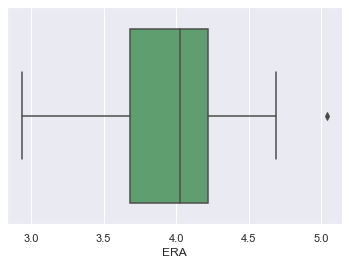

AxesSubplot(0.125,0.125;0.775x0.755)


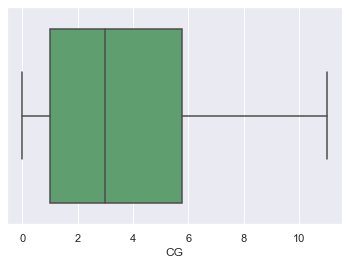

AxesSubplot(0.125,0.125;0.775x0.755)


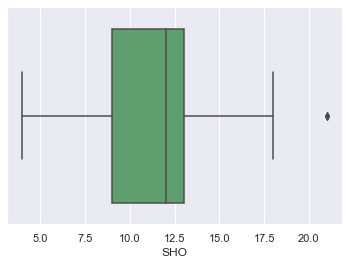

AxesSubplot(0.125,0.125;0.775x0.755)


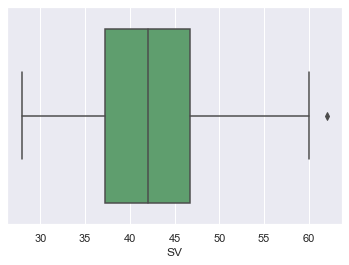

AxesSubplot(0.125,0.125;0.775x0.755)


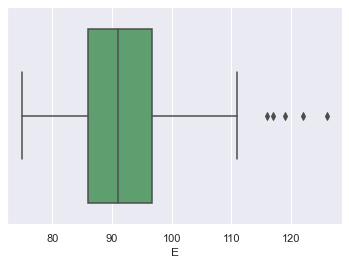

In [5]:
col=['R','AB','H','2B','3B','HR','BB','SO','SB','RA','ER','ERA','CG','SHO','SV','E']
for i in range(0,16):
    print(sns.boxplot(df[col[i]],color='g'))
    plt.show()

We can see visually that there are multiple dots outside the plot which are indicating outliers

*Now, we will remove these outliers using below code*

In [6]:
from scipy.stats import zscore
import numpy as np
z = np.abs(zscore(df))
print('The shape of the dataset before removing outliers is',df.shape)
df_z = df[(z < 3).all(axis=1)]
print('The shape of the dataset after removing outliers is',df_z.shape)
df=df_z

The shape of the dataset before removing outliers is (30, 17)
The shape of the dataset after removing outliers is (29, 17)


We can see that one row is removed because it had outlier value in it

***Now lets see how each column is dependent on the output variable W.***

*We are using regplot here to visualize the same. There is a line that passes through the points in the plot which will give us an idea if that column is positively correlated or negatively correlated or not correlated at all.
If the line comes close to horizontal, we can assume that its not correlated and drop such columns as those columns are not helping us in any way to make our prediction.*

AxesSubplot(0.125,0.125;0.775x0.755)


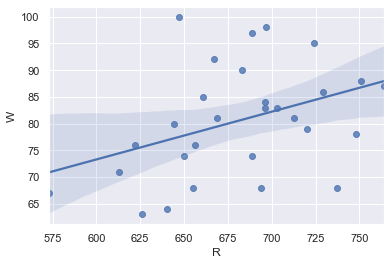

AxesSubplot(0.125,0.125;0.775x0.755)


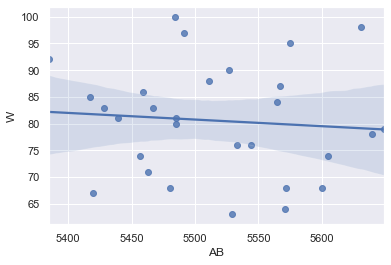

AxesSubplot(0.125,0.125;0.775x0.755)


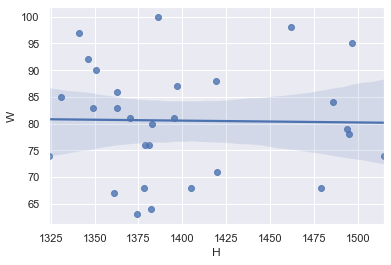

AxesSubplot(0.125,0.125;0.775x0.755)


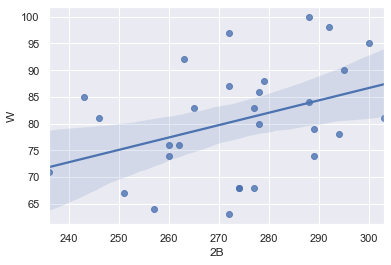

AxesSubplot(0.125,0.125;0.775x0.755)


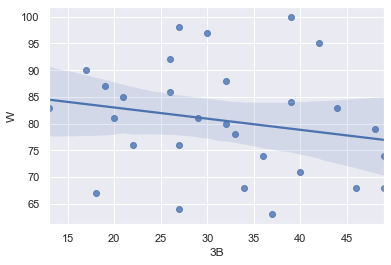

AxesSubplot(0.125,0.125;0.775x0.755)


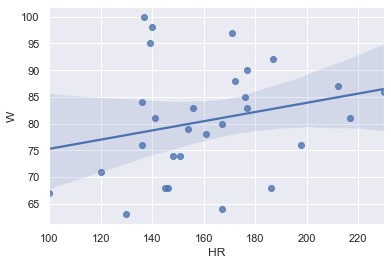

AxesSubplot(0.125,0.125;0.775x0.755)


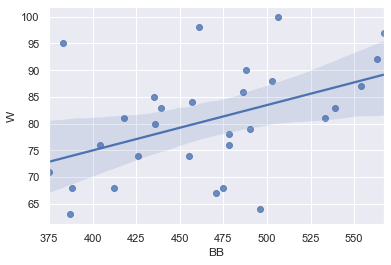

AxesSubplot(0.125,0.125;0.775x0.755)


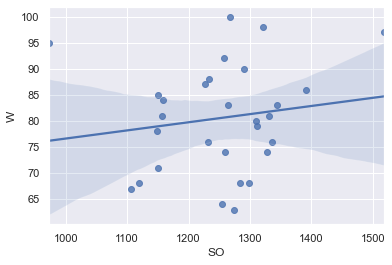

AxesSubplot(0.125,0.125;0.775x0.755)


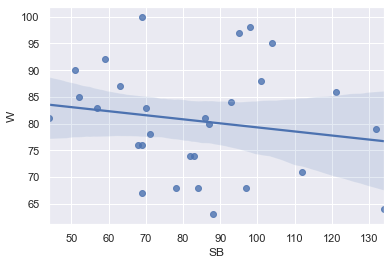

AxesSubplot(0.125,0.125;0.775x0.755)


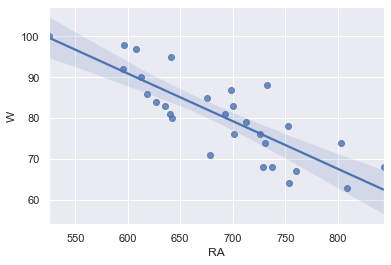

AxesSubplot(0.125,0.125;0.775x0.755)


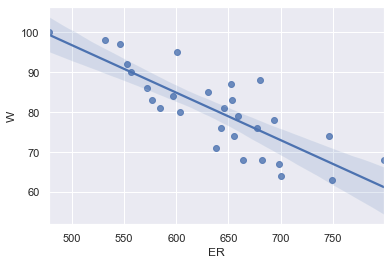

AxesSubplot(0.125,0.125;0.775x0.755)


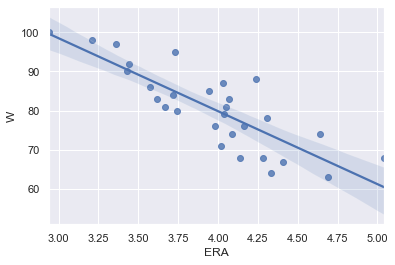

AxesSubplot(0.125,0.125;0.775x0.755)


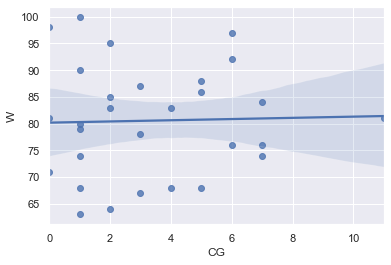

AxesSubplot(0.125,0.125;0.775x0.755)


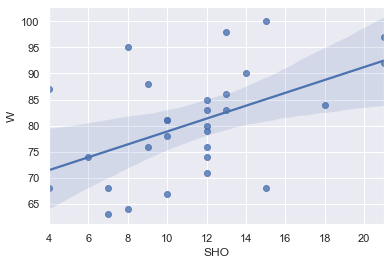

AxesSubplot(0.125,0.125;0.775x0.755)


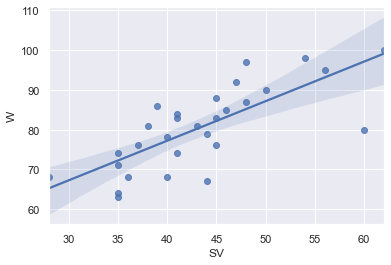

AxesSubplot(0.125,0.125;0.775x0.755)


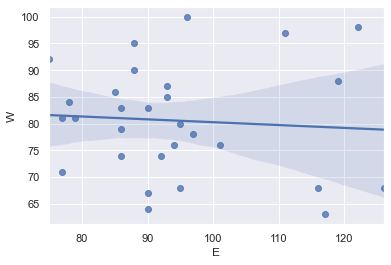

In [7]:
for i in range(0,16):
    print(sns.regplot(x=col[i],y="W",data=df))
    plt.show()

We can see that for some attributes the line is almost horizontal, we can drop such columns as they are of no use to us in predicting number of wins

***Lets calculate correlation to make this more clear***

In [8]:
df.corr()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.390451,-0.085780,-0.018360,0.384886,-0.206737,0.245697,0.447513,0.156469,-0.169503,-0.823176,-0.815308,-0.826952,0.029594,0.497526,0.749290,-0.072858
R,0.390451,1.000000,0.438022,0.433525,0.469293,0.134204,0.586894,0.258450,0.081158,0.075323,-0.013858,0.007727,-0.009122,0.101438,-0.085108,0.061381,0.043123
AB,-0.085780,0.438022,1.000000,0.769159,0.490752,0.445604,-0.064653,-0.137850,-0.111243,0.373674,0.315499,0.309146,0.254872,-0.078511,-0.198872,-0.113342,0.316297
H,-0.018360,0.433525,0.769159,1.000000,0.528016,0.582024,-0.218711,-0.222271,-0.371861,0.417877,0.244606,0.280571,0.256458,0.092577,-0.135116,-0.079814,-0.011945
2B,0.384886,0.469293,0.490752,0.528016,1.000000,0.342419,-0.098695,0.211243,-0.096772,0.194308,-0.215196,-0.224993,-0.248212,0.244856,0.084060,0.269999,0.145032
3B,-0.206737,0.134204,0.445604,0.582024,0.342419,1.000000,-0.369299,-0.404852,-0.196586,0.483818,0.312750,0.333731,0.325883,-0.003733,-0.058896,-0.210627,0.108610
HR,0.245697,0.586894,-0.064653,-0.218711,-0.098695,-0.369299,1.000000,0.336814,0.479914,-0.166072,-0.092586,-0.062094,-0.070756,0.065978,0.005546,0.066984,-0.189790
BB,0.447513,0.258450,-0.137850,-0.222271,0.211243,-0.404852,0.336814,1.000000,0.315566,-0.117622,-0.425381,-0.455832,-0.465794,0.417437,0.473922,0.187101,-0.050114
SO,0.156469,0.081158,-0.111243,-0.371861,-0.096772,-0.196586,0.479914,0.315566,1.000000,0.038188,-0.140570,-0.177655,-0.195362,-0.053075,0.231230,0.091394,0.142740
SB,-0.169503,0.075323,0.373674,0.417877,0.194308,0.483818,-0.166072,-0.117622,0.038188,1.000000,0.134315,0.146243,0.128848,-0.030708,-0.104602,-0.179741,0.082702


***Lets visualize using heat map as well***

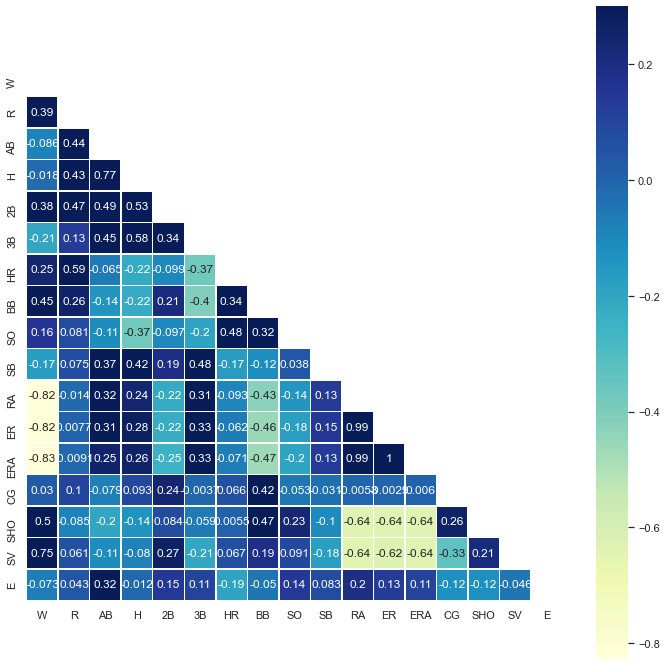

In [9]:
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(12, 12))
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True,annot=True, linewidths=0.5,cmap="YlGnBu")

***Lets find out the columns that are not correlated with our output variable and which are not useful to us in any way***

In [10]:
df1=df.corr()
#since we only care about the correlation with our output, lets separate it
df2=df1.iloc[0:1,:]
np.abs(df2)

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.0,0.390451,0.08578,0.01836,0.384886,0.206737,0.245697,0.447513,0.156469,0.169503,0.823176,0.815308,0.826952,0.029594,0.497526,0.74929,0.072858


If the value is 0 there is no correlation, if value is 1 they are highly correlated.

***Lets set our threshold value as 0.1 and drop columns with value less than this considering they are not correlated***

In [11]:
np.abs(df2)<0.1

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,False,False,True,True,False,False,False,False,False,False,False,False,False,True,False,False,True


We see that AB,H,CG and E are not correlated to W, hence we can drop them as they are not giving us any useful information

***Lets drop unnecessary columns***

In [12]:
df=df.drop(['AB','H','CG','E'],axis=1)

In [13]:
df.head()

,W,R,2B,3B,HR,BB,SO,SB,RA,ER,ERA,SHO,SV
0,95,724,300,42,139,383,973,104,641,601,3.73,8,56
1,83,696,277,44,156,439,1264,70,700,653,4.07,12,45
2,81,669,303,29,141,533,1157,86,640,584,3.67,10,38
3,76,622,260,27,136,404,1231,68,701,643,3.98,9,37
4,74,689,289,49,151,455,1259,83,803,746,4.64,12,35


***Lets separate our dependent variable Y, in this dataset W and our independent variable X, in this dataset (R 2B	3B	HR	BB	SO	SB	RA	ER	ERA	SHO	SV)***

In [14]:
df_x=df.iloc[:,1:13]
df_x.head()

,R,2B,3B,HR,BB,SO,SB,RA,ER,ERA,SHO,SV
0,724,300,42,139,383,973,104,641,601,3.73,8,56
1,696,277,44,156,439,1264,70,700,653,4.07,12,45
2,669,303,29,141,533,1157,86,640,584,3.67,10,38
3,622,260,27,136,404,1231,68,701,643,3.98,9,37
4,689,289,49,151,455,1259,83,803,746,4.64,12,35


In [15]:
df_y=df['W']
df_y.head()

0    95
1    83
2    81
3    76
4    74
Name: W, dtype: int64

***Lets check for skewness in our input features***

In [16]:
df_x.skew()

R     -0.215364
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
SHO    0.526943
SV     0.627480
dtype: float64

We see that there is only one column i.e, SV that is positively skewed because it has value greater than 0.55

**Note:** As Dataset is small, we can see the dataset directly and make decision, or else we would have implemented some code to check for us.

***Lets eliminate the skewness in our input attributes***

In [17]:
for i in df_x.skew().index:
    if df_x.skew().loc[i]>0.55:
        df_x[i]=np.log1p(df_x[i])

In [18]:
df_x.skew()

R     -0.215364
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
SHO    0.526943
SV     0.109983
dtype: float64

Now our input attributes are not skewed any more

***Lets scale our data using standard scalar***

In [19]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
ss.fit(df_x)
x=ss.transform(df_x)

Data is scaled but it is in array, lets convert it in to dataframe

In [20]:
x=pd.DataFrame(x,columns=df_x.columns)
x.head()

,R,2B,3B,HR,BB,SO,SB,RA,ER,ERA,SHO,SV
0,0.959398,1.556538,1.010845,-0.765863,-1.536359,-2.727623,0.905953,-0.664514,-0.511148,-0.511388,-0.813262,1.554812
1,0.331147,0.201171,1.208917,-0.181389,-0.495021,0.121896,-0.585315,0.154638,0.232161,0.238952,0.159299,0.296229
2,-0.274666,1.733325,-0.276617,-0.697101,1.252941,-0.925866,0.116458,-0.678397,-0.754153,-0.643801,-0.326982,-0.672787
3,-1.329231,-0.800621,-0.474688,-0.869006,-1.145857,-0.201246,-0.673037,0.168522,0.089217,0.040333,-0.570122,-0.825263
4,0.174084,0.908319,1.704094,-0.353293,-0.197495,0.072935,-0.015124,1.584683,1.561540,1.496876,0.159299,-1.142637


We have both of input and output attributes cleaned and in desired format

<h2>End of EDA Process</h2>

Lets start Building models to make predictions and find the model that works best on our dataset

<h2>Start of Machine Learning Process</h2>

**We see that our output variable "Number of wins (W)" is a Discrete variable. Choosing algorithm, whether Regression or Classification depends on output variable.**

**The output column is in Discrete. But still, the nature of the data is continious.Hence we will do regression on our dataset**

***Lets import required packages***

In [21]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

***Lets find best random state where we will get maximum R2 score***

In [23]:
max_r_score=0
for r_state in range(42,100):
    x_train, x_test, y_train, y_test = train_test_split(x,df_y,random_state = r_state,test_size=0.20)
    lr = linear_model.LinearRegression()
    lr.fit(x_train,y_train)
    y_pred = lr.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
print("Maximum R2 score is achived for random state ",final_r_state," with a score of",max_r_score)

Maximum R2 score is achived for random state  69  with a score of 0.9773659536129052


*Since we are getting high score of 0.977 with Linear Regression, we won't be testing the dataset on any other model*

***Lets check if our model is over fitting or underfitting the dataset using Cross Validation***

In [24]:
score=cross_val_score(lr,x,df_y,cv=5,scoring="r2")
abs(score).mean()

0.7303307964987156

***Lets check Cross validation explicitly for the random state we have claculated***

In [25]:
from sklearn.model_selection import KFold
folds = KFold(n_splits = 6, shuffle = True, random_state = 69)
scores = cross_val_score(lr, x_train, y_train, scoring='r2', cv=folds)
abs(scores).mean() 

0.6904152600301847

We can see that Cross validation scores obtained are not significantly different, hence we can assume that our model is neither over fitting nor underfitting

***Buliding Final Model***

In [26]:
x_train,x_test,y_train,y_test=train_test_split(x,df_y,test_size=0.2,random_state=69)

In [27]:
print("The number of data going to train the model is", x_train.shape,y_train.shape)
print("The number of data going to test the model is", x_test.shape,y_test.shape)


The number of data going to train the model is (23, 12) (23,)
The number of data going to test the model is (6, 12) (6,)


In [28]:
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
print("R2 score is : ",r2_score(y_test,y_pred))
print("RMSE is : ",np.sqrt(mean_squared_error(y_test,y_pred)))

R2 score is :  0.9773659536129052
RMSE is :  1.8825818521680784


***Lets visualize the performace of our model***

***Improting libraries for plotting***

In [29]:
%%capture
! pip install ipywidgets
from IPython.display import display
from IPython.html import widgets 
from IPython.display import display
from ipywidgets import interact, interactive, fixed, interact_manual

***Creating Functions for Plotting***

In [30]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)
    plt.title(Title)
    plt.xlabel('Input features')
    plt.ylabel('Number of wins')
    plt.show()
    plt.close()
    
def PollyPlot(xtrain, xtest, y_train, y_test, lr,poly_transform):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    xmax=max([xtrain.values.max(), xtest.values.max()])
    xmin=min([xtrain.values.min(), xtest.values.min()])
    x=np.arange(xmin, xmax, 0.1)
    plt.plot(xtrain, y_train, 'ro', label='Training Data')
    plt.plot(xtest, y_test, 'go', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    plt.ylim([-10000, 60000])
    plt.ylabel('Price')
    plt.legend()

Prediction using train data:

In [32]:
yh_train = lr.predict(x_train)

Prediction using test data:

In [33]:
yh_test = lr.predict(x_test)

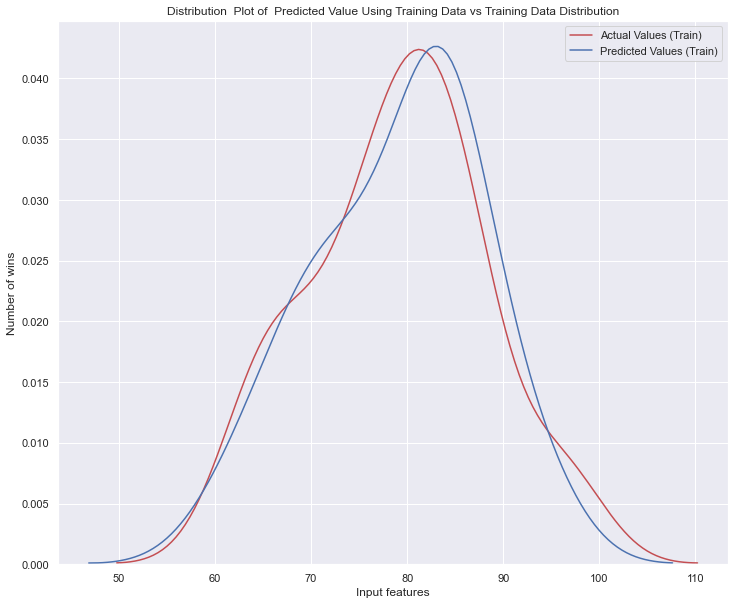

In [34]:
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_train, yh_train, "Actual Values (Train)", "Predicted Values (Train)", Title)


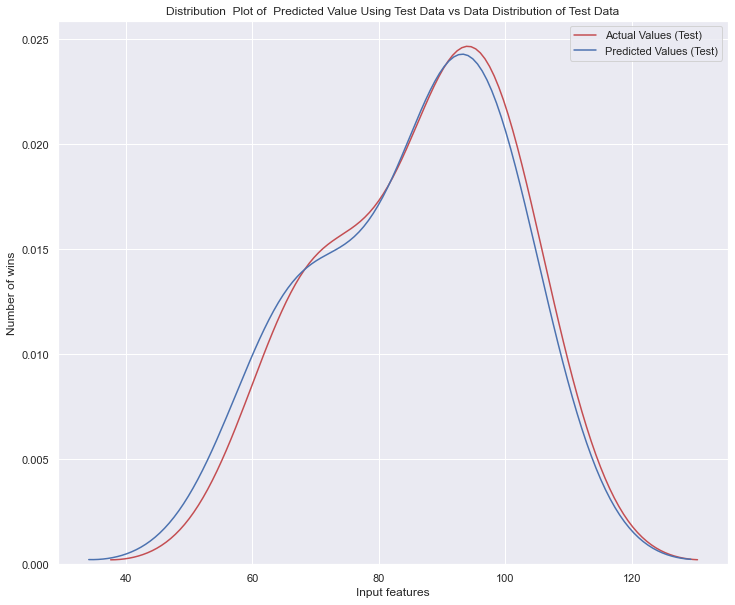

In [35]:
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test,yh_test,"Actual Values (Test)","Predicted Values (Test)",Title)


<h2>End of Machine learning Process</h2>

<h1>Now lets save our final model</h1>

In [36]:
import joblib
joblib.dump(lr,'Baseball_case_study.pkl')

['Baseball_case_study.pkl']

<img src="https://knowledge.wharton.upenn.edu/wp-content/uploads/2020/05/Women-in-data-science.jpg">